In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import folium

In [3]:
# Ignore warnings
warnings.filterwarnings("ignore")
# Display all columns
pd.set_option("display.max_columns", None)

sns.set_style("darkgrid")

In [4]:
# Load Data Set
airports_df = pd.read_csv(r'D:\programing\DA\My Test\Data\airports_geolocation.csv')
cancelled_diverted_df = pd.read_csv(r'D:\programing\DA\My Test\Data\Cancelled_Diverted_2023.csv')
flights_df = pd.read_csv(r'D:\programing\DA\My Test\Data\US_flights_2023.csv')
weather_df = pd.read_csv(r'D:\programing\DA\My Test\Data\weather_meteo_by_airport.csv')

Flights info
- **index:** Unique flight ID (primary key)
- **Day_Of_Week:** Contains the days of the week from 1 to 7
- **Dep_Delay:** Departure delay ranging from -99 minutes to 4413 minutes with an average of 12.20 minutes
- **Dep_Delay_Tag:** Delay tag where 1 represents a delay of more than 5 minutes
- **Arr_Delay:** Arrival delay ranging from -119 minutes to 4405 minutes with an average of 6.62 minutes
- **Flight_Duration:** Flight duration ranging from 0 to 795 minutes with an average of 140 minutes
- **Delay_Carrier:** Delays caused by the airline ranging from 0 minutes to 3957 minutes
- **Delay_Weather:** Weather-related delays ranging from 0 to 1860 minutes
- **Delay_NAS:** Delays related to air traffic control (National Aviation System) ranging from 0 to 1708 minutes
- **Delay_Security:** Delays related to security checks ranging from 0 to 1460 minutes
- **Delay_LastAircraft:** Delays due to waiting for the aircraft ranging from 0 to 3581 minutes
- **Aircraft_age:** Age of the aircraft ranging from 1 to 57 years with an average of 13.48 years
- **Airline:** Contains the names of the **15 airlines** present in the dataset.
- **Tail_Number:** Unique identifier of the aircraft. **5963 aircraft** are present.
- **Dep_Airport:** Unique identifier of each departure airport. **350 airports** are represented.
- **Dep_CityName:** Names of the departure cities. **344 cities** are represented.
- **DepTime_label:** Division of the day into 6-hour periods (Night - Morning - Afternoon - Evening).
- **Dep_Delay_Type:** 3 categories of departure delays (Low < 5min - Medium > 15min - High > 60min).
- **CityName:** Names of the arrival cities. 344 cities are represented.
- **Arr_Delay_Type:** 3 categories of arrival delays (Low < 5min - Medium > 15min - High > 60min).
- **Distance_type:** 3 categories of flight distances in miles (Short Haul < 1500Mi, Medium Haul < 3000Mi, Long Haul < 6000Mi).
- **Manufacturer:** Aircraft manufacturer. **5 aircraft manufacturers** are present.
- **Model:** Model name given by the manufacturer. 21 aircraft models are present.


Cancelled Diverted info
- **index:** Unique flight ID (primary key)
- **Day_Of_Week:** Contains the days of the week from 1 to 7
- **Dep_Delay:** Departure delay ranging from -99 minutes to 4413 minutes with an average of 12.20 minutes
- **Dep_Delay_Tag:** Delay tag where 1 represents a delay of more than 5 minutes
- **Arr_Delay:** Arrival delay ranging from -119 minutes to 4405 minutes with an average of 6.62 minutes
- **Flight_Duration:** Flight duration ranging from 0 to 795 minutes with an average of 140 minutes
- **Delay_Carrier:** Delays caused by the airline ranging from 0 minutes to 3957 minutes
- **Delay_Weather:** Weather-related delays ranging from 0 to 1860 minutes
- **Delay_NAS:** Delays related to air traffic control (National Aviation System) ranging from 0 to 1708 minutes
- **Delay_Security:** Delays related to security checks ranging from 0 to 1460 minutes
- **Delay_LastAircraft:** Delays due to waiting for the aircraft ranging from 0 to 3581 minutes
- **Aircraft_age:** Age of the aircraft ranging from 1 to 57 years with an average of 13.48 years
- **Airline:** Contains the names of the **15 airlines** present in the dataset.
- **Tail_Number:** Unique identifier of the aircraft. **5963 aircraft** are present.
- **Dep_Airport:** Unique identifier of each departure airport. **350 airports** are represented.
- **Dep_CityName:** Names of the departure cities. **344 cities** are represented.
- **DepTime_label:** Division of the day into 6-hour periods (Night - Morning - Afternoon - Evening).
- **Dep_Delay_Type:** 3 categories of departure delays (Low < 5min - Medium > 15min - High > 60min).
- **CityName:** Names of the arrival cities. 344 cities are represented.
- **Arr_Delay_Type:** 3 categories of arrival delays (Low < 5min - Medium > 15min - High > 60min).
- **Distance_type:** 3 categories of flight distances in miles (Short Haul < 1500Mi, Medium Haul < 3000Mi, Long Haul < 6000Mi).
- **Manufacturer:** Aircraft manufacturer. **5 aircraft manufacturers** are present.
- **Model:** Model name given by the manufacturer. 21 aircraft models are present.
- **Canceled flight (bool)**
- **Diverted flight (bool)**

Weather info

- **time** Timestamps associated with the weather data (yyyy-mm-dd). 
- **tavg** Average Temperature (°C). 
- **tmin** Minimum Temperature (°C).
- **tmax** Maximum Temperature (°C).
- **prcp** Total precipitation amount in mm. 
- **snow** Snow Depth.
- **wdir** Wind (From) Direction (Degrees).
- **wspd** Average Wind Speed (km/h). 
- **pres** Sea-Level Air Pressure (hPa)
- **airport_id** Unique identifier for the airport where the weather data was collected. 


Airports info
- **IATA_CODE**	Unique identifier for the airport.
- **AIRPORT**	Full name of the airport.
- **CITY**	City where the airport is located.
- **STATE**	State (US) where the airport is located.
- **COUNTRY**	Country where the airport is located (Always US).
- **LATITUDE**	Geographic latitude of the airport in decimal degrees.
- **LONGITUDE**	Geographic longitude of the airport in decimal degrees.


flights_df: 
RangeIndex: 6743404 entries, 0 to 6743403
Data columns (total 27 columns):
    Column              Dtype         
---  ------              -----         
 0   index               int64         
 1   FlightDate          datetime64[ns]
 2   Day_Of_Week         category      
 3   Airline             category      
 4   Tail_Number         object        
 5   Dep_Airport         category      
 6   Dep_CityName        category      
 7   DepTime_label       category      
 8   Dep_Delay           int64         
 9   Dep_Delay_Tag       int64         
 10  Dep_Delay_Type      category      
 11  Arr_Airport         category      
 12  Arr_CityName        category      
 13  Arr_Delay           int64         
 14  Arr_Delay_Type      category      
 15  Flight_Duration     int64         
 16  Distance_type       category      
 17  Delay_Carrier       int64         
 18  Delay_Weather       int64         
 19  Delay_NAS           int64         
 20  Delay_Security      int64         
 21  Delay_LastAircraft  int64         
 22  Manufacturer        category      
 23  Model               category      
 24  Aicraft_age         int64         
 25  Month               int32         
 26  Year                int32         
dtypes: category(12), datetime64[ns](1), int32(2), int64(11), object(1)
memory usage: 823.2+ MB

weather_df: 
RangeIndex: 132860 entries, 0 to 132859
Data columns (total 10 columns):
    Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        132860 non-null  datetime64[ns]
 1   tavg        132860 non-null  float64       
 2   tmin        132860 non-null  float64       
 3   tmax        132860 non-null  float64       
 4   prcp        132860 non-null  float64       
 5   snow        132860 non-null  float64       
 6   wdir        132860 non-null  float64       
 7   wspd        132860 non-null  float64       
 8   pres        132860 non-null  float64       
 9   airport_id  132860 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 10.1+ MB

cancelled_diverted_df: 
Index: 103543 entries, 0 to 104487
Data columns (total 23 columns):
    Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   FlightDate          103543 non-null  datetime64[ns]
 1   Day_Of_Week         103543 non-null  category      
 2   Airline             103543 non-null  category      
 3   Tail_Number         103543 non-null  object        
 4   Cancelled           103543 non-null  category      
 5   Diverted            103543 non-null  category      
 6   Dep_Airport         103543 non-null  category      
 7   Dep_CityName        103543 non-null  category      
 8   DepTime_label       103543 non-null  category      
 9   Dep_Delay           103543 non-null  float64       
 10  Dep_Delay_Tag       103543 non-null  category      
 11  Dep_Delay_Type      103543 non-null  category      
 12  Arr_Airport         103543 non-null  category      
 13  Arr_CityName        103543 non-null  category      
 14  Arr_Delay           103543 non-null  float64       
 15  Arr_Delay_Type      103543 non-null  category      
 16  Flight_Duration     103543 non-null  float64       
 17  Distance_type       103543 non-null  category      
 18  Delay_Carrier       103543 non-null  float64       
 19  Delay_Weather       103543 non-null  float64       
 20  Delay_NAS           103543 non-null  float64       
 21  Delay_Security      103543 non-null  float64       
 22  Delay_LastAircraft  103543 non-null  float64       
dtypes: category(13), datetime64[ns](1), float64(8), object(1)
memory usage: 10.4+ MB

airports_df: 
RangeIndex: 364 entries, 0 to 363
Data columns (total 7 columns):
    Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   IATA_CODE  364 non-null    object  
 1   AIRPORT    364 non-null    category
 2   CITY       364 non-null    category
 3   STATE      364 non-null    category
 4   COUNTRY    364 non-null    category
 5   LATITUDE   364 non-null    float64 
 6   LONGITUDE  364 non-null    float64 
dtypes: category(4), float64(2), object(1)
memory usage: 35.1+ KB


In [5]:
print("flights_df: ")
flights_df.info()
print("weather_df: ")
weather_df.info()
print("cancelled_diverted_df: ")
cancelled_diverted_df.info()
print("airports_df: ")
airports_df.info()

flights_df: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6743404 entries, 0 to 6743403
Data columns (total 24 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   FlightDate          object
 1   Day_Of_Week         int64 
 2   Airline             object
 3   Tail_Number         object
 4   Dep_Airport         object
 5   Dep_CityName        object
 6   DepTime_label       object
 7   Dep_Delay           int64 
 8   Dep_Delay_Tag       int64 
 9   Dep_Delay_Type      object
 10  Arr_Airport         object
 11  Arr_CityName        object
 12  Arr_Delay           int64 
 13  Arr_Delay_Type      object
 14  Flight_Duration     int64 
 15  Distance_type       object
 16  Delay_Carrier       int64 
 17  Delay_Weather       int64 
 18  Delay_NAS           int64 
 19  Delay_Security      int64 
 20  Delay_LastAircraft  int64 
 21  Manufacturer        object
 22  Model               object
 23  Aicraft_age         int64 
dtypes: int64(11), object(13)
memory usage

# Data preprocessing

In [6]:
day_of_week_mapping = {
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday",
    7: "Sunday",
}
flights_df["Day_Of_Week"] = flights_df["Day_Of_Week"].map(day_of_week_mapping)
cancelled_diverted_df["Day_Of_Week"] = cancelled_diverted_df["Day_Of_Week"].map(day_of_week_mapping)

flights_df["FlightDate"] = pd.to_datetime(flights_df["FlightDate"])
cancelled_diverted_df ["FlightDate"] = cancelled_diverted_df["FlightDate"].astype("datetime64[ns]")

flights_df["Month"] = flights_df["FlightDate"].dt.month
flights_df["Year"] = flights_df["FlightDate"].dt.year
flights_df = flights_df.reset_index(drop=False)

# Convert categorical columns
categorical_columns = [
    "Airline",
    "Day_Of_Week",
    "Dep_Airport",
    "Arr_Airport",
    "Dep_CityName",
    "Arr_CityName",
    "DepTime_label",
    "Dep_Delay_Type",
    "Arr_Delay_Type",
    "Distance_type",
    "Manufacturer",
    "Model",
]
for column in categorical_columns:
    flights_df[column] = flights_df[column].astype("category")

categorical_columns =[
    "Day_Of_Week",
    "Airline",
    "Cancelled",
    "Diverted",
    "Dep_Airport",
    "Dep_CityName",
    "DepTime_label",
    "Dep_Delay_Tag",
    "Dep_Delay_Type",
    "Arr_Airport",
    "Arr_CityName",
    "Arr_Delay_Type",
    "Distance_type",   
]
for column in categorical_columns:
    cancelled_diverted_df[column] =cancelled_diverted_df[column].astype("category")

weather_df["time"] = weather_df["time"].astype("datetime64[ns]")

categorical_columns = ["AIRPORT", "CITY", "STATE", "COUNTRY"]

for column in categorical_columns:
    airports_df[column] = airports_df[column].astype("category")

# Check for duplicates and remove them
cancelled_diverted_df = cancelled_diverted_df.drop_duplicates()
flights_df = flights_df.drop_duplicates()

 # 1. Univariate Analysis

In [7]:
# Creation of a dataset for delayed flights analysis
only_late_flights = flights_df[flights_df["Arr_Delay"] > 0].copy()
# Counting the number of delayed flights
count_late_flights = len(only_late_flights)
# Finding the most delayed flights
Delay_max = round(only_late_flights["Arr_Delay"].max(), 2)
# Finding number of  flights
flight_count = len(flights_df)

# Displaying numerical information about delayed flights

print(
    f"- {count_late_flights} flights are affected by arrival delays, representing {round((count_late_flights * 100) / len(flights_df),2)}% of all flights."
)

print(
    f"- The average delay for these flights is {round(only_late_flights['Arr_Delay'].mean(),2)} minutes with a median value of {round(only_late_flights['Arr_Delay'].median(),2)} minutes."
)

print(
    f"- The maximum delay is {Delay_max} minutes, which is {round(Delay_max/60,2)} hours."
)
print(f"-  Total flights in 2023: {flight_count:,}")
print(f"- Average daily flights: {round((flight_count/365)/1000,2)}k")
print(
    f"- Average aircraft age: {round(flights_df['Aicraft_age'].mean(),2)} years"
) 
# Corrected typo here


# 1.3 Flight Duration Analysis
total_flight_hours = round(flights_df["Flight_Duration"].sum() / 60_000_000, 2)
avg_flight_duration = round(flights_df["Flight_Duration"].mean() / 60, 2)
print(f"- Total flight hours: {total_flight_hours} million hours")
print(f"- Average flight duration: {avg_flight_duration} hours")


- 2472530 flights are affected by arrival delays, representing 36.67% of all flights.
- The average delay for these flights is 41.54 minutes with a median value of 18.0 minutes.
- The maximum delay is 4405 minutes, which is 73.42 hours.
-  Total flights in 2023: 6,743,404
- Average daily flights: 18.48k
- Average aircraft age: 13.48 years
- Total flight hours: 15.77 million hours
- Average flight duration: 2.34 hours


 ## Distribution of Departure Delays
 This histogram shows the distribution of departure delays in minutes. It helps us understand the frequency and range of delays experienced by flights.

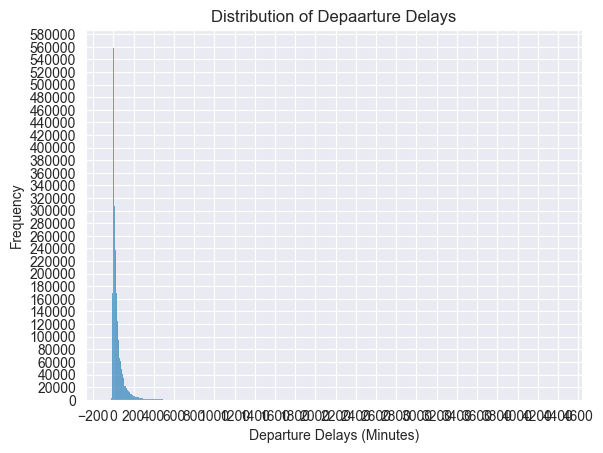

In [8]:
plt.Figure(figsize=(20,6))
sns.histplot(only_late_flights["Dep_Delay"],bins=505)
plt.title("Distribution of Depaarture Delays")
plt.xlabel("Departure Delays (Minutes)")
plt.ylabel("Frequency")
ax = plt.gca()
ax.yaxis.set_major_locator(plt.MaxNLocator(30))
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
plt.show()

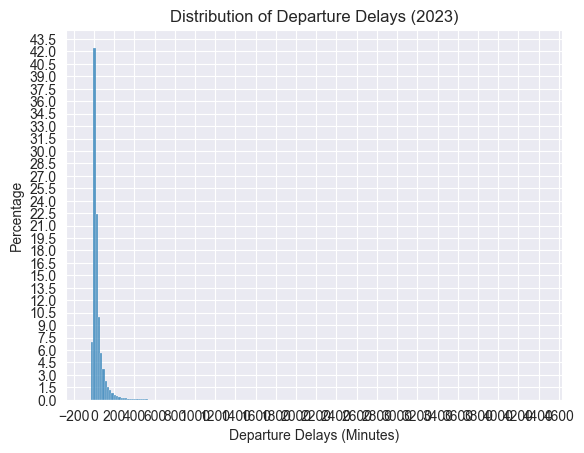

In [9]:
plt.Figure(figsize=(20,6))
sns.histplot(only_late_flights["Dep_Delay"],bins=200,stat="percent")
plt.title("Distribution of Departure Delays (2023)")
plt.xlabel("Departure Delays (Minutes)")
plt.ylabel("Percentage")
ax = plt.gca()
ax.yaxis.set_major_locator(plt.MaxNLocator(30))
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
plt.show()



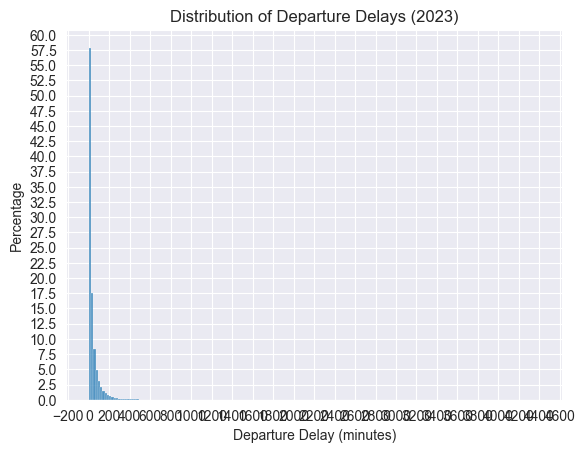

In [10]:
plt.Figure(figsize=(20, 6))
sns.histplot(only_late_flights["Arr_Delay"], bins=200, stat="percent")
plt.title("Distribution of Departure Delays (2023)")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Percentage")
ax = plt.gca()
ax.yaxis.set_major_locator(plt.MaxNLocator(30))
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
plt.show()

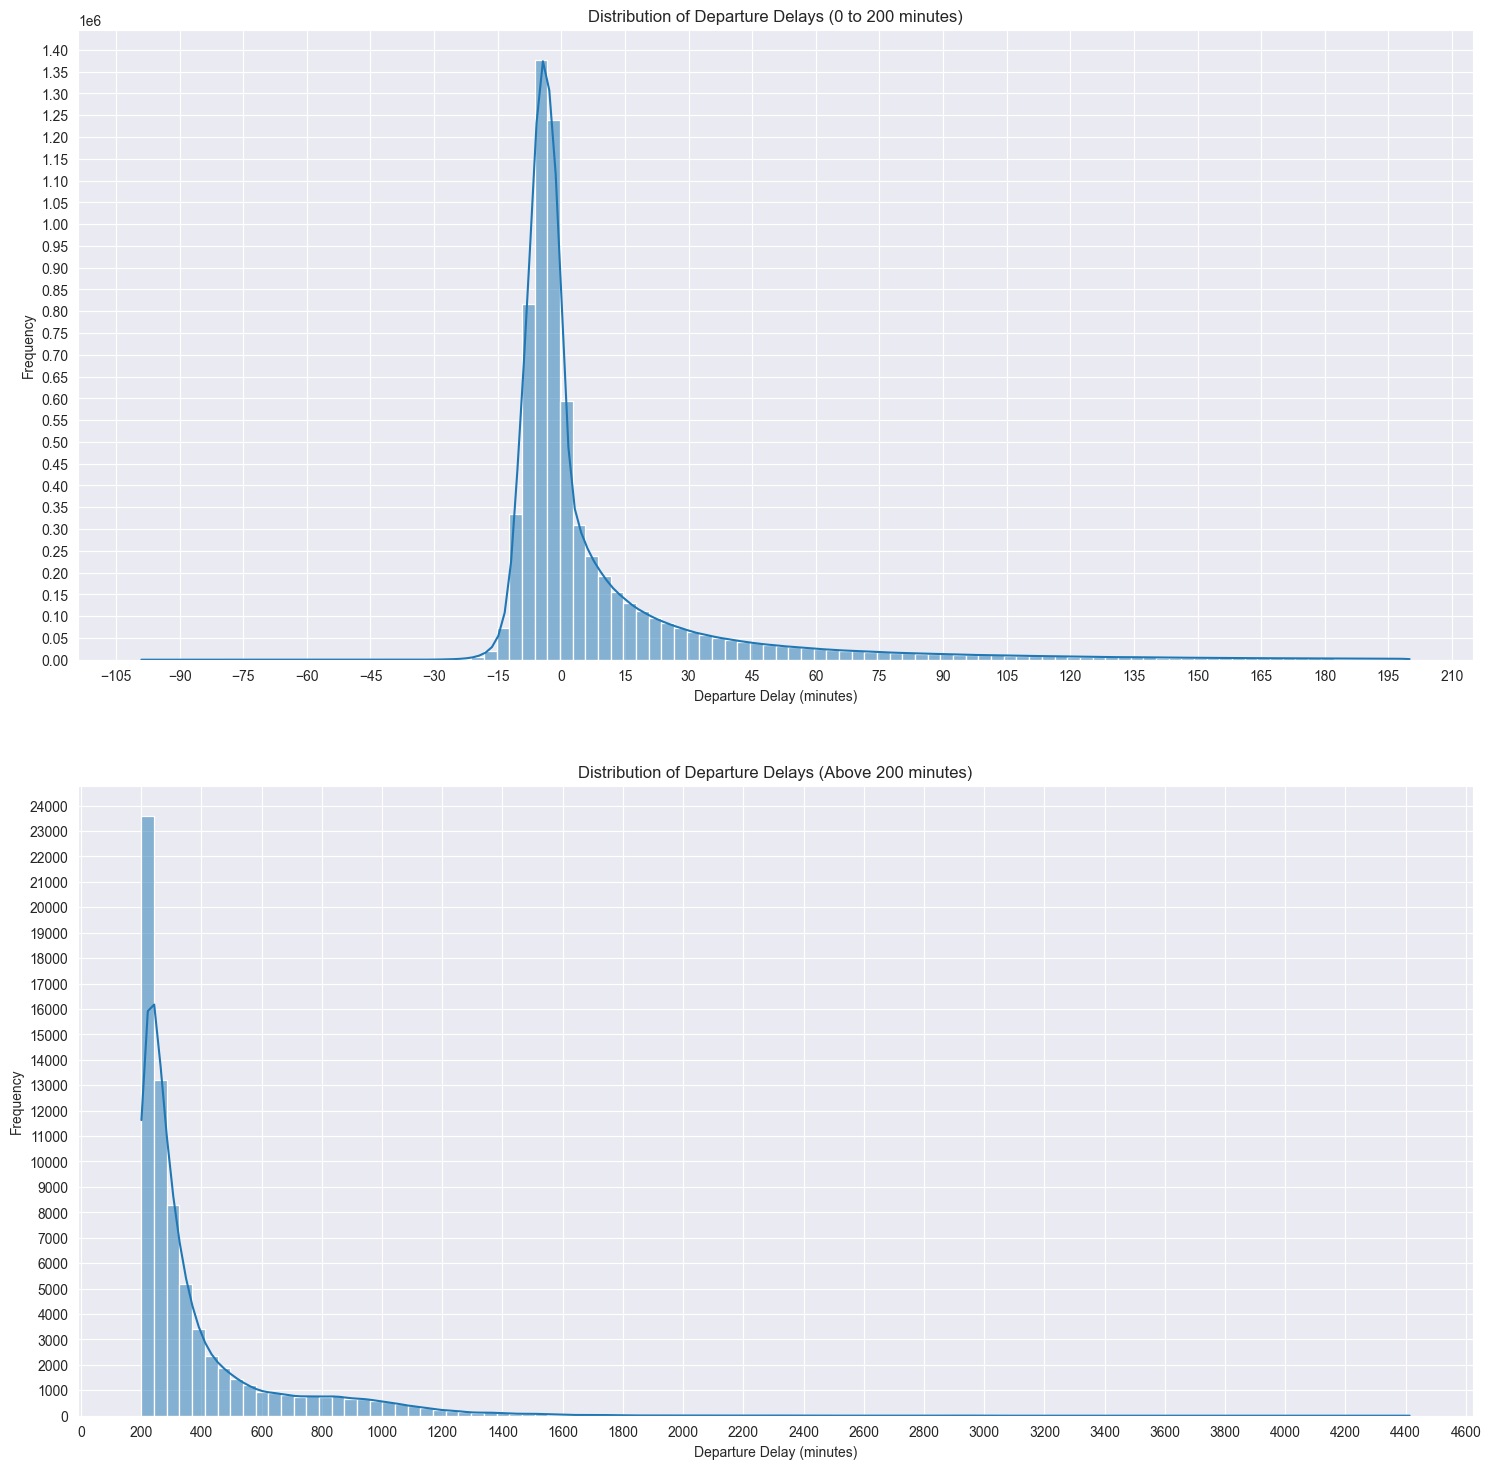

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

split = 200  # Split threshold

# Split the data
flights_df_0_split = flights_df[flights_df["Dep_Delay"] <= split]
flights_df_above_split = flights_df[flights_df["Dep_Delay"] > split]

# Create subplots without sharing the y-axis
fig, axes = plt.subplots(2, 1, figsize=(18, 18), sharey=False)

# Plot histogram for 0 to split
sns.histplot(
    flights_df_0_split["Dep_Delay"], bins=100, kde=True, ax=axes[0]
)
axes[0].set_title(f"Distribution of Departure Delays (0 to {split} minutes)")
axes[0].set_xlabel("Departure Delay (minutes)")
axes[0].set_ylabel("Frequency")
axes[0].yaxis.set_major_locator(
    plt.MaxNLocator(30)
)  # Adjust the number of ticks as needed
axes[0].xaxis.set_major_locator(
    plt.MaxNLocator(30)  # Increase the number of x-ticks
)  # Adjust the number of ticks as needed

# Plot histogram for above split
sns.histplot(
    flights_df_above_split["Dep_Delay"], bins=100, kde=True, ax=axes[1]
)
axes[1].set_title(f"Distribution of Departure Delays (Above {split} minutes)")
axes[1].set_xlabel("Departure Delay (minutes)")
axes[1].set_ylabel("Frequency")
axes[1].yaxis.set_major_locator(
    plt.MaxNLocator(30)
)  # Adjust the number of ticks as needed
axes[1].xaxis.set_major_locator(
    plt.MaxNLocator(nbins=30)  # Increase the number of x-ticks
)
# Show the plot
# plt.tight_layout()
plt.show()

 ## Distribution of Flight Durations
 This histogram displays the distribution of flight durations in minutes. It gives us insight into the typical length of flights and any patterns in flight duration.

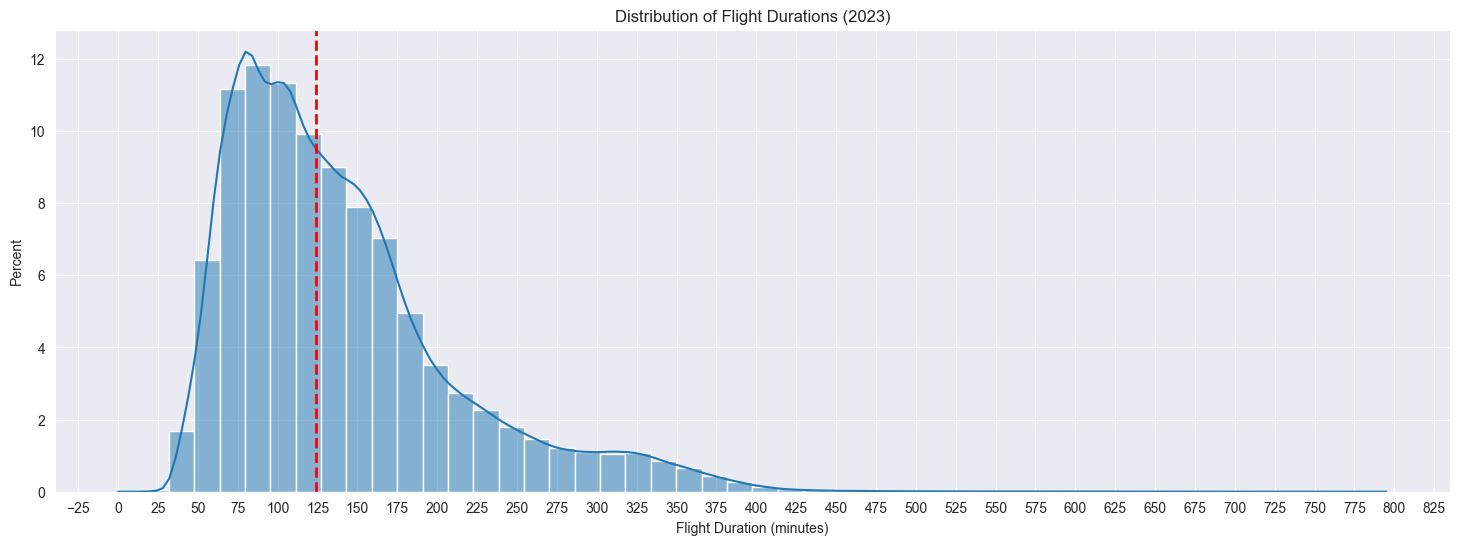

In [12]:
median_value = flights_df["Flight_Duration"].median()

plt.figure(figsize=(18, 6))
sns.histplot(flights_df["Flight_Duration"], bins=50, kde=True, stat="percent")
plt.title("Distribution of Flight Durations (2023)")
plt.xlabel("Flight Duration (minutes)")
plt.ylabel("Percent")

ax = plt.gca()  # Get the current axes
ax.xaxis.set_major_locator(plt.MaxNLocator(40))

# Add median line
ax.axvline(x=median_value, color="red", linestyle="dashed", linewidth=2)

plt.show()


 ## Distribution of Aircraft Ages
 This histogram shows the distribution of aircraft ages in years. It helps us understand the age profile of the fleet used for these flights.

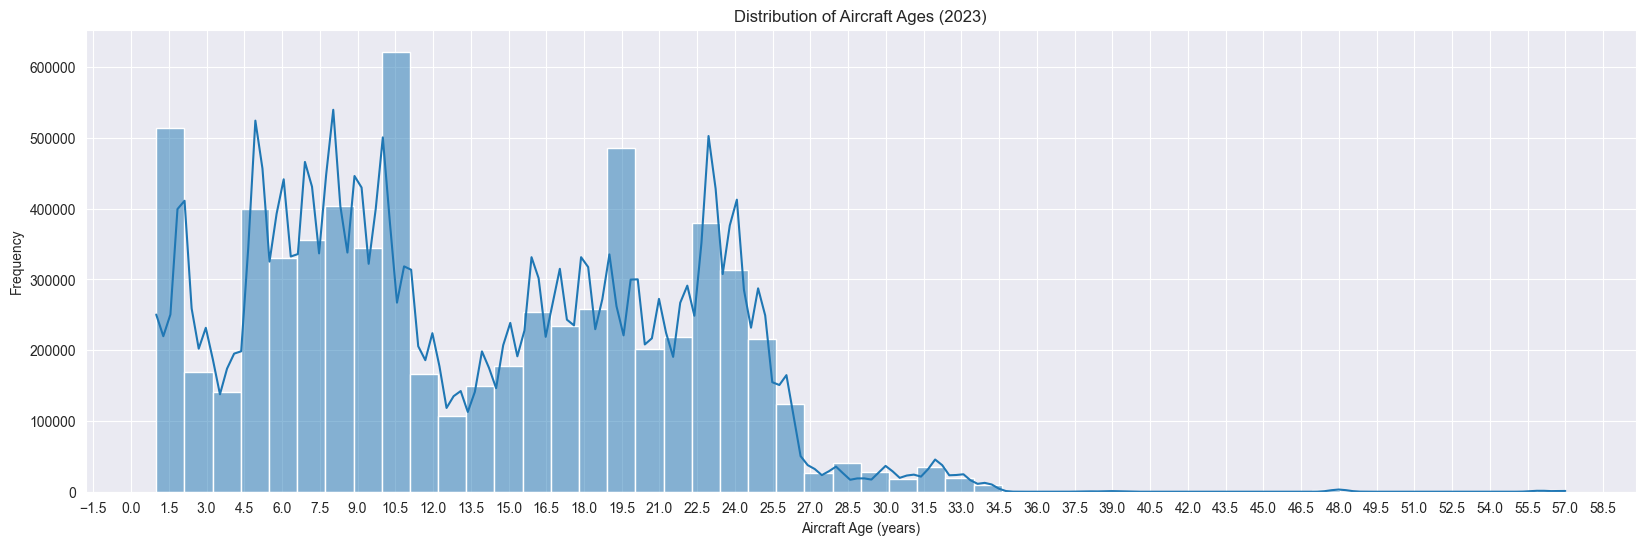

In [13]:
plt.figure(figsize=(20, 6))
sns.histplot(flights_df["Aicraft_age"], bins=50, kde=True)
plt.title("Distribution of Aircraft Ages (2023)")
plt.xlabel("Aircraft Age (years)")
plt.ylabel("Frequency")
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=50))# Increase the number of x-ticks
plt.show()

 ## Distribution of Temperature
 This histogram displays the distribution of average temperatures recorded at airports. It gives us an idea of the weather conditions experienced across different airports.

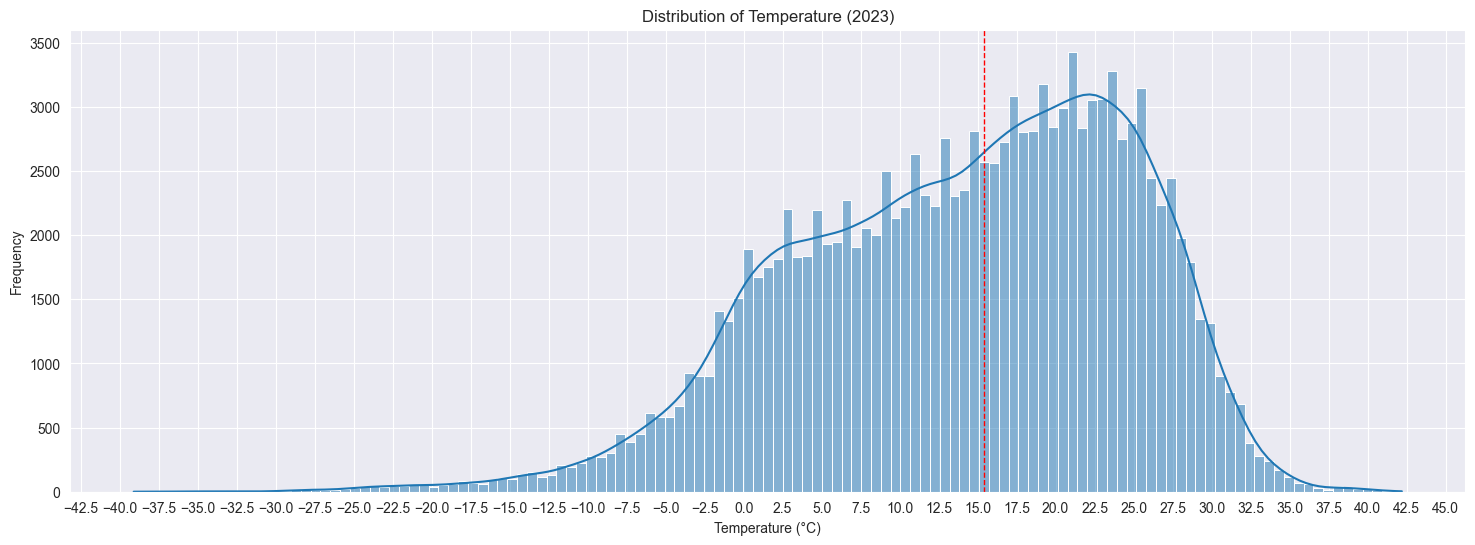

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming weather_df is already defined and loaded with your data
median_temp = weather_df["tavg"].median()

plt.figure(figsize=(18, 6))
sns.histplot(weather_df["tavg"], kde=True)

# Calculate the position of the median line
median_position = median_temp

plt.axvline(x=median_position, color="red", linestyle="dashed", linewidth=1)
plt.title("Distribution of Temperature (2023)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
ax = plt.gca()  # Get the current axes
ax.xaxis.set_major_locator(plt.MaxNLocator(40))

plt.show()

## Distribution of departure delay types (Dep_Delay_Type)


In [15]:
# Assuming flights_df is already defined and has the required data
distribution = (
    flights_df["Dep_Delay_Type"].value_counts(normalize=True) * 100
)  # Calculate percentages
distribution
# Convert the Series to a DataFrame for better handling with Seaborn
distribution_df = distribution.reset_index()
distribution_df.columns = ["Dep_Delay_Type", "Percentage"]
distribution_df

,Dep_Delay_Type,Percentage
0,Low <5min,80.222644
1,Medium >15min,13.020101
2,Hight >60min,6.757255


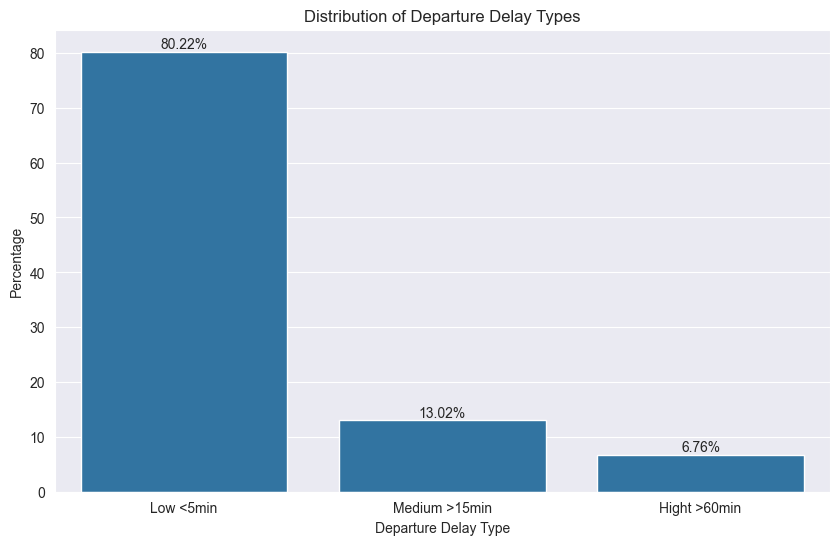

In [16]:
# Assuming flights_df is already defined and has the required data
distribution = (flights_df["Dep_Delay_Type"].value_counts(normalize=True)*100)# Calculate percentages

# Convert the Series to a DataFrame for better handling with Seaborn
distribution_df = distribution.reset_index()
distribution_df.columns = ["Dep_Delay_Type", "Percentage"]

# Plot using Seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=distribution_df,
    x="Dep_Delay_Type",
    y="Percentage",
    order=distribution_df["Dep_Delay_Type"]
)

# Adding text annotations for each bar
for index, row in distribution_df.iterrows():
    barplot.text(
        index, row["Percentage"], f"{row['Percentage']:.2f}%",ha = "center",va = "bottom"
    )
plt.title("Distribution of Departure Delay Types")
plt.xlabel("Departure Delay Type")
plt.ylabel("Percentage")
plt.show()


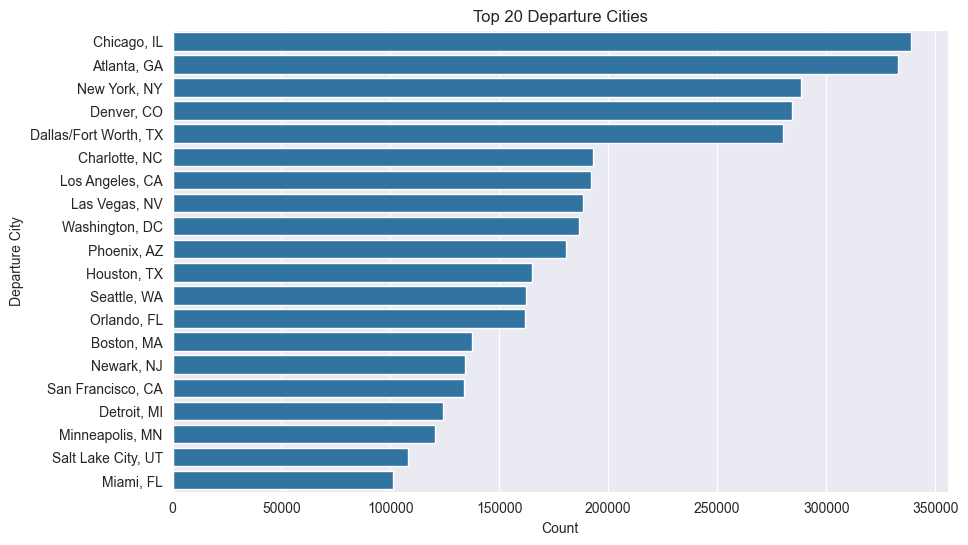

In [17]:
# Frequency distribution of departure cities (Dep_CityName)
plt.figure(figsize=(10, 6))
top_departure_cities = flights_df["Dep_CityName"].value_counts().nlargest(20).index
sns.countplot(
    y="Dep_CityName", 
    data=flights_df[flights_df["Dep_CityName"].isin(top_departure_cities)],
    order=top_departure_cities
)
plt.title("Top 20 Departure Cities")
plt.xlabel("Count")
plt.ylabel("Departure City")
plt.show()

 # 2. Bivariate Analysis

## Average Arrival Delays by Manufacturer

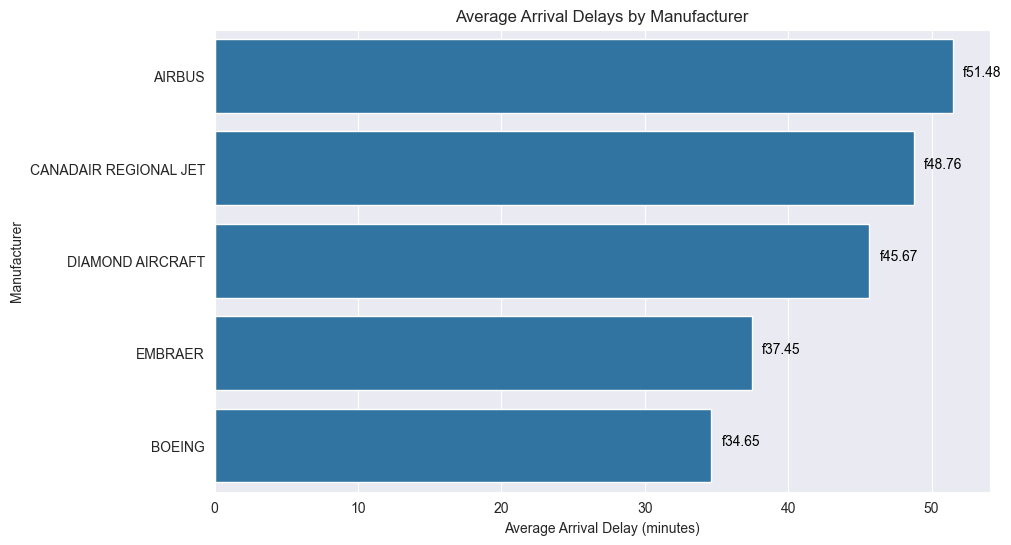

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average arrival delays for each manufacturer
avg_delays = only_late_flights.groupby("Manufacturer")["Arr_Delay"].mean().reset_index()

# Sort the manufacturers by their average delays
avg_delays_sorted = avg_delays.sort_values("Arr_Delay",ascending=False)

# Create the bar plot with the sorted order
plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_delays_sorted,
    y="Manufacturer",
    x="Arr_Delay",
    order=avg_delays_sorted['Manufacturer']
)

# Add labels and title
plt.title("Average Arrival Delays by Manufacturer")
plt.xlabel("Average Arrival Delay (minutes)")
plt.ylabel("Manufacturer")

# Annotate the bars with the average delay values
for index, value in enumerate(avg_delays_sorted["Arr_Delay"]):
    plt.text(value+0.7, index, f"f{value:.2f}", color="black", ha="left")

plt.show()   


 ## Average Departure Delay by Airline
 This bar plot shows the average departure delay for each airline. It allows us to compare the punctuality of different airlines.

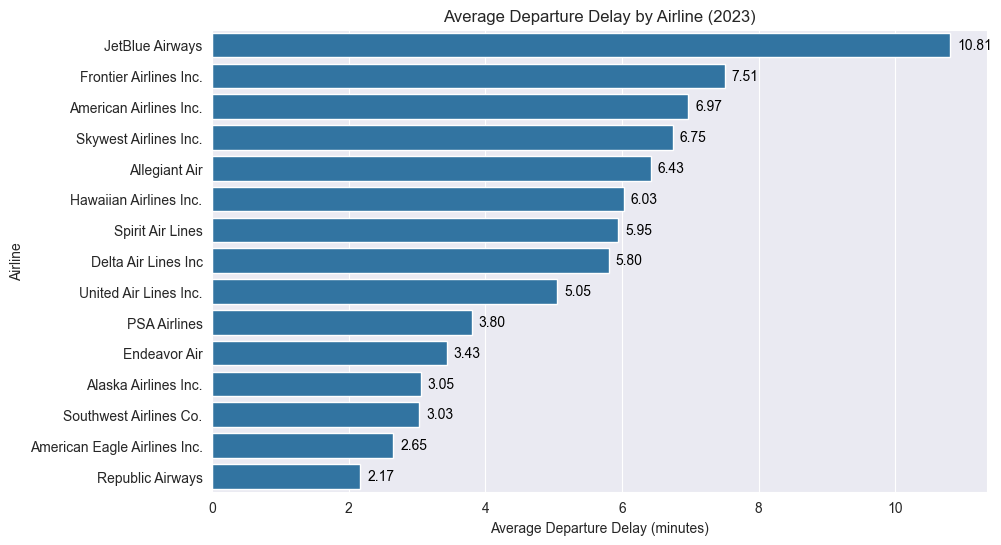

In [19]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

# Calculate the average departure delay by airline and sort the values
avg_dep_delay_by_airline = (
    flights_df.groupby("Airline")["Delay_Carrier"].mean().sort_values(ascending=False)
)
#Create the plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x=avg_dep_delay_by_airline.values,
    y=avg_dep_delay_by_airline.index,
    order=avg_dep_delay_by_airline.index
)

# Add Annotations
for index, value in enumerate(avg_dep_delay_by_airline.values):
    barplot.text(
        value + 0.1, index, f"{value:.2f}", color="black", ha="left", va="center" 
    )

# Set titles and labels
plt.title("Average Departure Delay by Airline (2023)")
plt.xlabel("Average Departure Delay (minutes)")
plt.ylabel("Airline")

# Show the plot
plt.show()




 ## Average Departure Delay Over Time
 This line plot shows how the average departure delay changes over the months of 2023. It helps identify any seasonal patterns in delays.

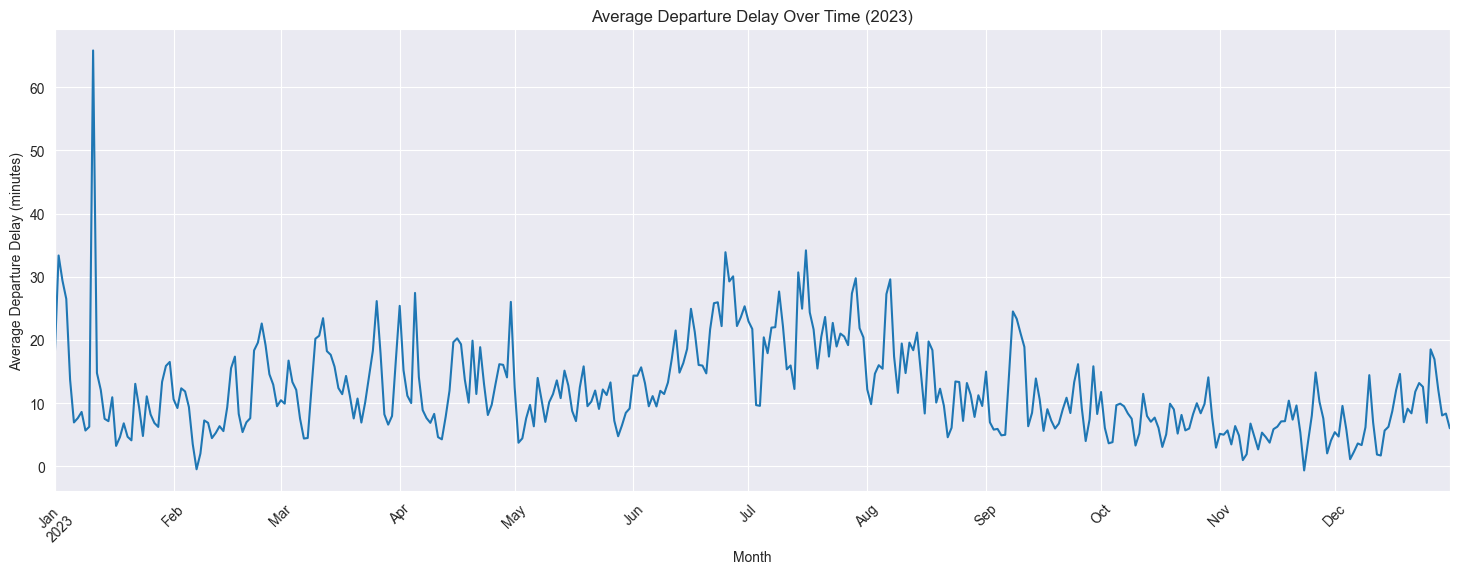

In [20]:
avg_delay_by_month = flights_df.groupby(["FlightDate"])["Dep_Delay"].mean()
plt.figure(figsize=(18, 6))
avg_delay_by_month.plot()
plt.title("Average Departure Delay Over Time (2023)")
plt.xlabel("Month")
plt.ylabel("Average Departure Delay (minutes)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [21]:
# Find the index of the max average delay
max_day_of_average_delay = avg_delay_by_month.idxmax()
print(f"The max day fo average delay occurred o {max_day_of_average_delay}.")

The max day fo average delay occurred o 2023-01-11 00:00:00.


 ## Average Departure Delay by Day of the Week
 This bar plot displays the average departure delay for each day of the week. It helps identify if certain days are more prone to delays than others.

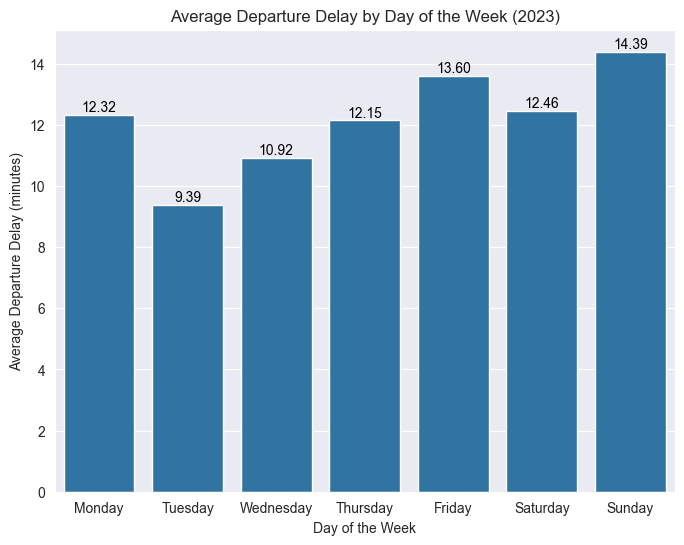

In [22]:
avg_delay_by_dayofweek = flights_df.groupby("Day_Of_Week")["Dep_Delay"].mean()

order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
sorted_flights_df = avg_delay_by_dayofweek.reindex(order)

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x=sorted_flights_df.index,
    y=sorted_flights_df.values,
    order=sorted_flights_df.index,
)
plt.title("Average Departure Delay by Day of the Week (2023)")
plt.xlabel("Day of the Week")
plt.ylabel("Average Departure Delay (minutes)")

# Add annotations
for index, value in enumerate(sorted_flights_df.values):
    ax.text(
        index, value + 0.01, f"{value:.2f}", color="black", ha="center", va="bottom"
    )

plt.show()


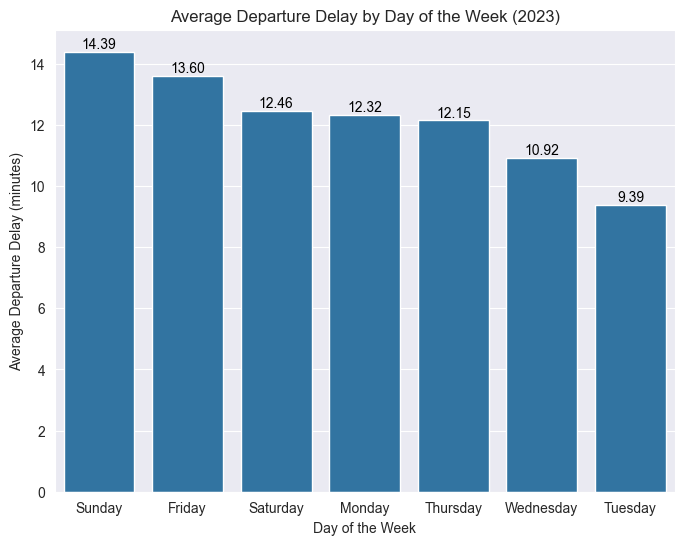

In [23]:
avg_delay_by_dayofweek = (
    flights_df.groupby("Day_Of_Week")["Dep_Delay"].mean().sort_values(ascending= False)
)

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x=avg_delay_by_dayofweek.index,
    y=avg_delay_by_dayofweek.values,
    order=avg_delay_by_dayofweek.index,
)

plt.title("Average Departure Delay by Day of the Week (2023)")
plt.xlabel("Day of the Week")
plt.ylabel("Average Departure Delay (minutes)")

for index,value in enumerate(avg_delay_by_dayofweek.values):
    ax.text(
        index, value + 0.01, f"{value:.2f}", color="black", ha="center", va="bottom"
    )

plt.show()


 ## Flight Duration Distribution by Airline
 This box plot shows the distribution of flight durations for each airline. It helps compare the typical flight lengths and variability among different airlines.

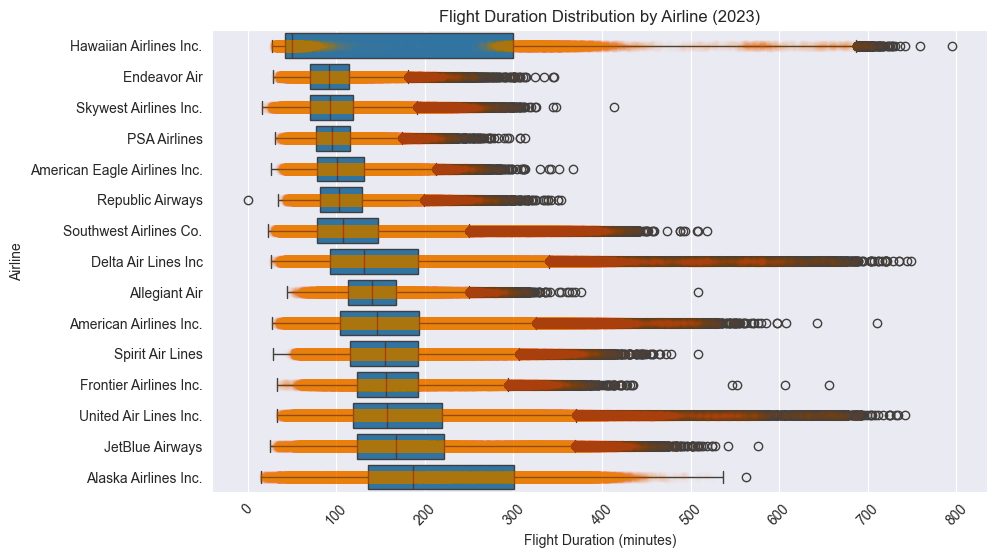

In [24]:
# Calculate median flight duration for each airline
median_duration = (
    flights_df.groupby("Airline")["Flight_Duration"].median().sort_values()
)

# Sort airlines by median flight duration
sorted_airlines = median_duration.index

plt.figure(figsize=(10, 6))
sns.boxplot(x="Flight_Duration",y="Airline", data= flights_df, order= sorted_airlines)
sns.stripplot(x="Flight_Duration",y="Airline", data=flights_df, order=sorted_airlines, alpha=0.01)

plt.title("Flight Duration Distribution by Airline (2023)")
plt.ylabel("Airline")
plt.xlabel("Flight Duration (minutes)")
plt.xticks(rotation=45)

plt.show()


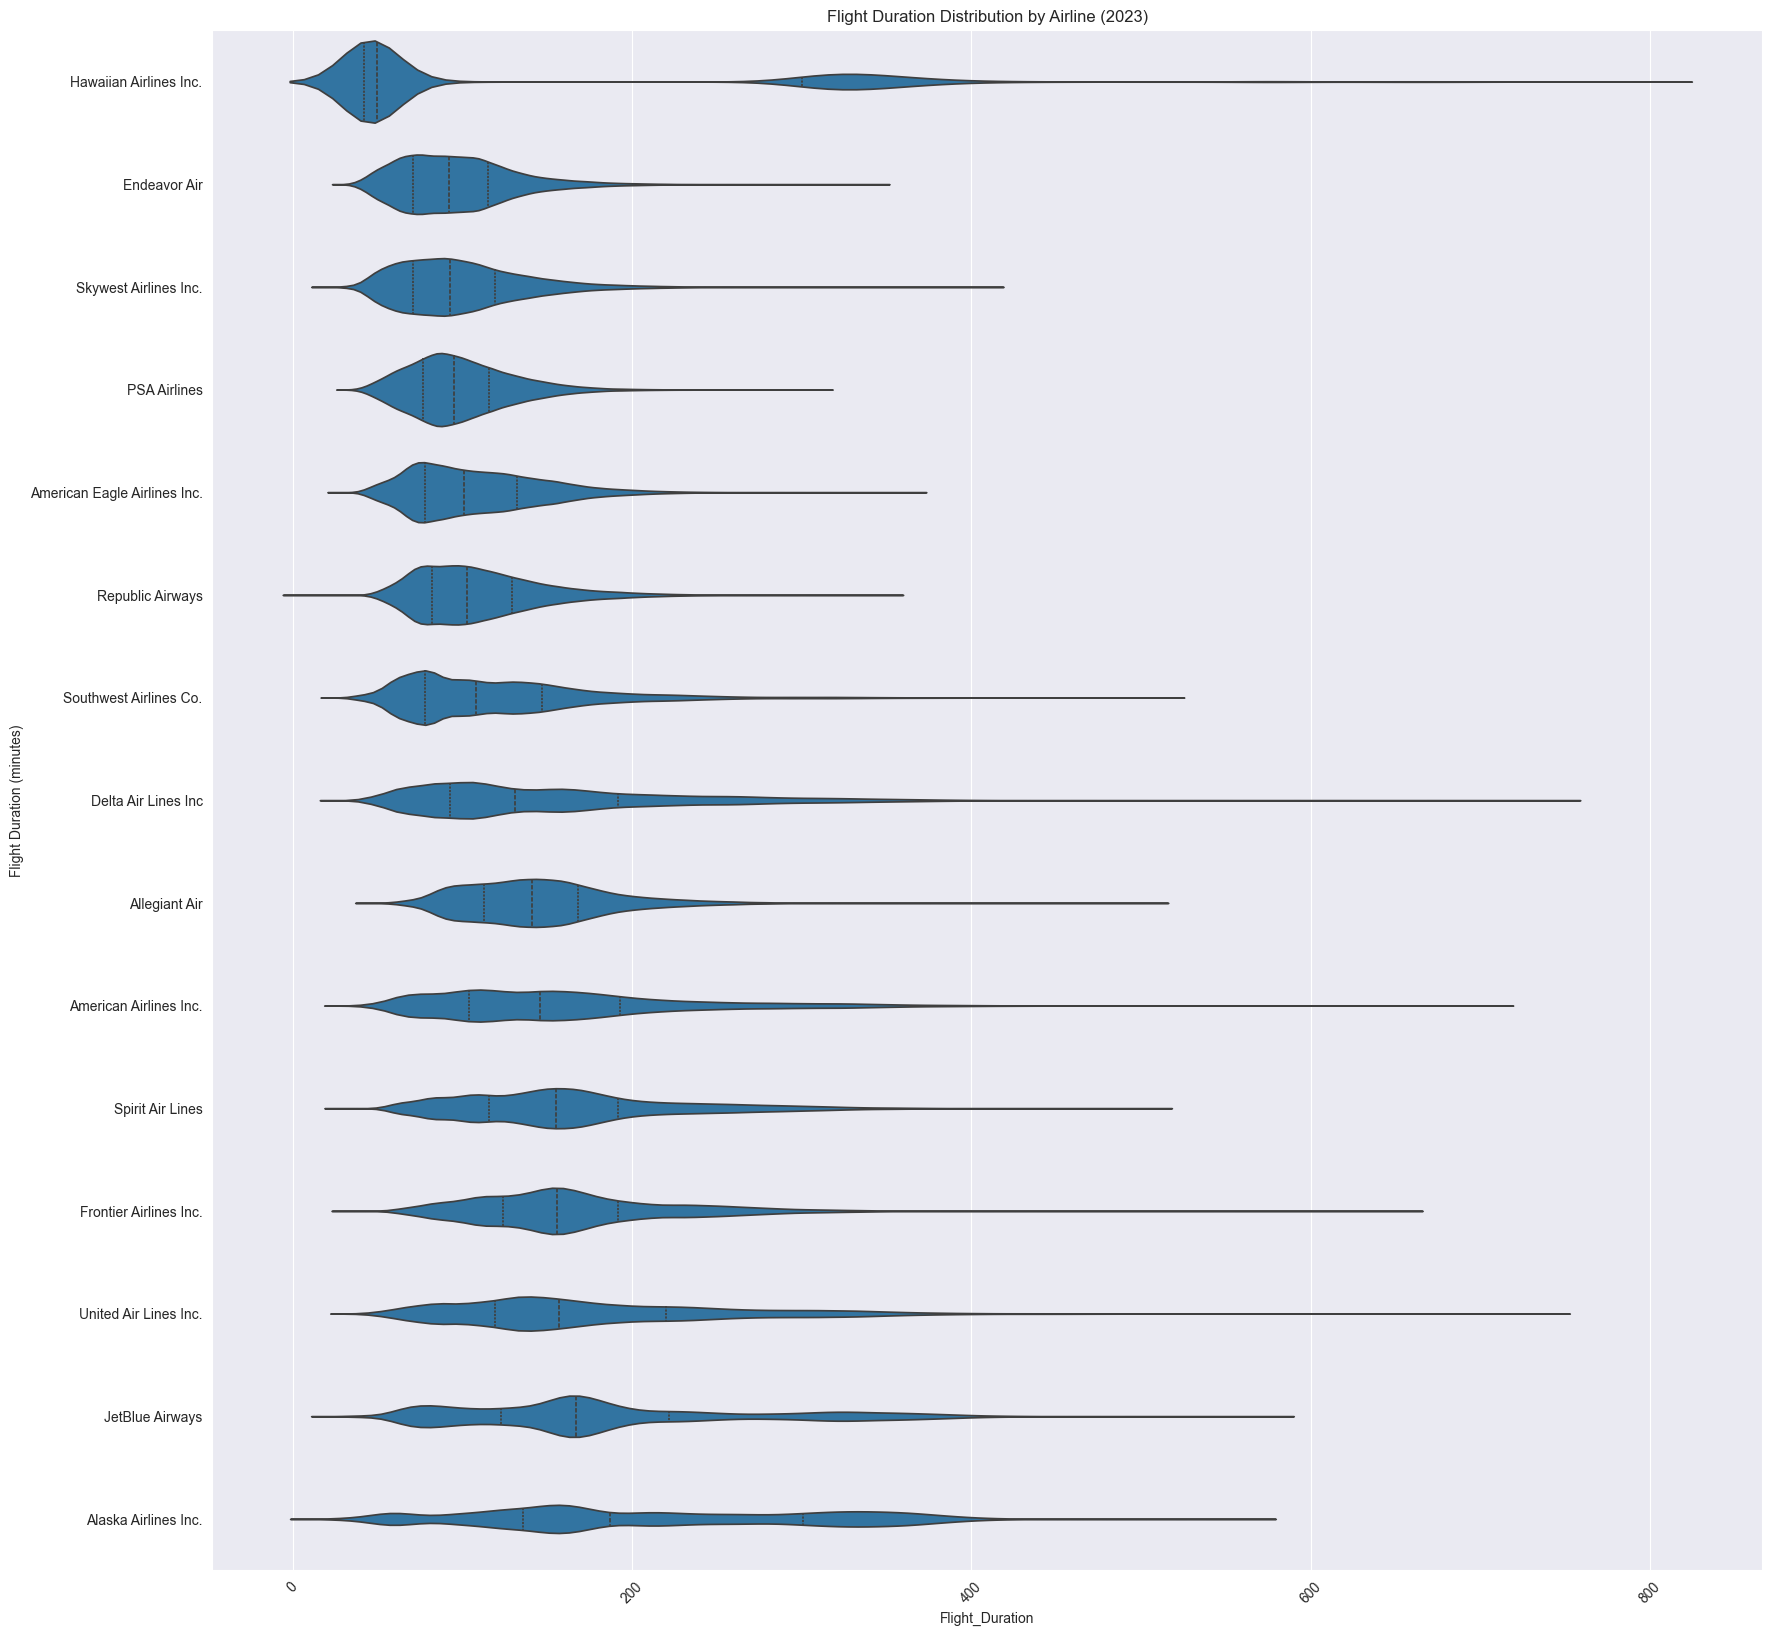

In [25]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(20, 20))
# Calculate median flight duration for each airline
median_duration=(
    flights_df.groupby("Airline")["Flight_Duration"].median().sort_values()
)
# Sort airlines by median flight duration
sorted_airlines = median_duration.index
# Flip the axes and add a strip plot
sns.violinplot(
    x="Flight_Duration",
    y="Airline",
    data=flights_df,
    order=sorted_airlines,
    inner="quartile",
)

plt.title("Flight Duration Distribution by Airline (2023)")
plt.ylabel("Flight Duration (minutes)")
plt.xticks(rotation=45)

plt.show()

 ## Average Departure Delay by Aircraft Manufacturer
 This bar plot displays the average departure delay for each aircraft manufacturer. It helps identify if certain manufacturers' aircraft are associated with more delays.

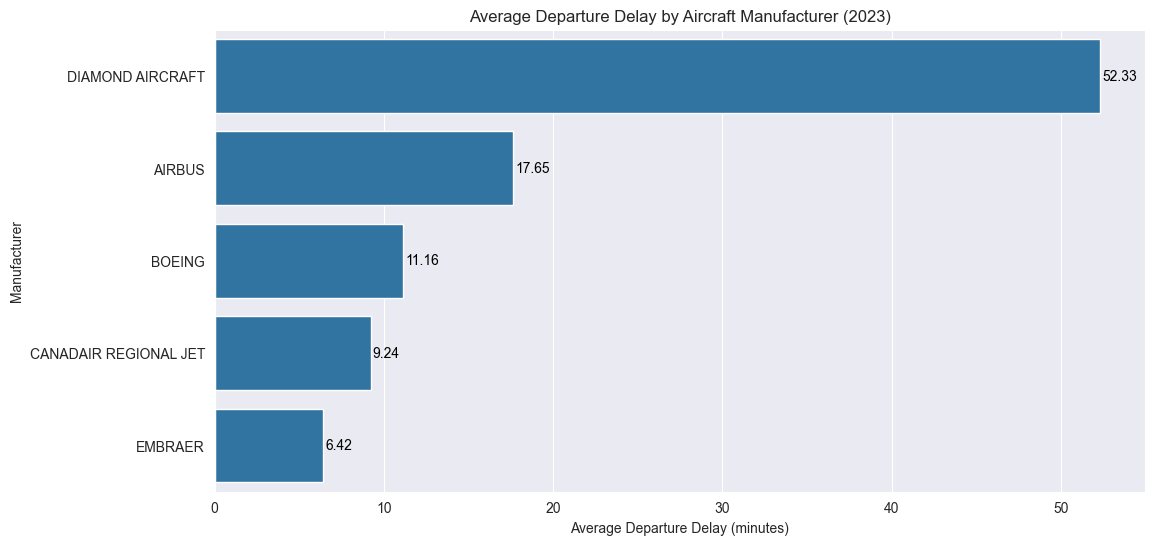

In [26]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# Assuming flights_df is already defined and contains the necessary data
avg_delay_by_manufacturer = (
    flights_df.groupby("Manufacturer")["Dep_Delay"].mean().sort_values(ascending=False)
)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=avg_delay_by_manufacturer.values,
    y=avg_delay_by_manufacturer.index,
    order=avg_delay_by_manufacturer.index,
    ax=plt.gca(),# Get the current Axes instance
)

ax=plt.gca()  # Get the current Axes instance
for index, value in enumerate(avg_delay_by_manufacturer.values):
    ax.text(
        value + 0.1,     # Adjust the x position slightly to the right of the bar
        index,           # Use the index directly as the y position
        f"{value:.2f}",  # Display the value with two decimal places
        color="black",  
        ha="left",   # Horizontal alignment
        va="center"  # Vertical alignment
    ) 


plt.title("Average Departure Delay by Aircraft Manufacturer (2023)")
plt.xlabel("Average Departure Delay (minutes)")  # Corrected spelling
plt.ylabel("Manufacturer")  # Corrected spelling
plt.show()



## Relationship between airline (Airline) and arrival delay (Arr_Delay)


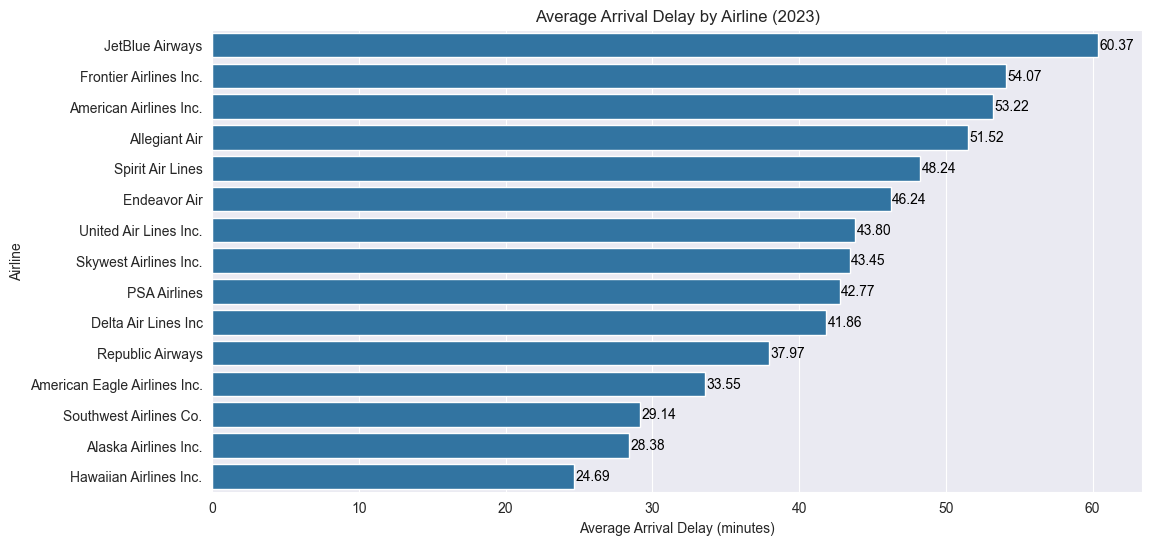

In [27]:
# Relationship between airline (Airline) and arrival delay (Arr_Delay)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming flights_df is already defined and contains the necessary data
lay_by_Airline = (
    only_late_flights.groupby("Airline")["Arr_Delay"].mean().sort_values(ascending=False)
)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=lay_by_Airline.values,
    y=lay_by_Airline.index,
    order=lay_by_Airline.index,
    ax=plt.gca(),  # Get the current Axes instance
)

ax = plt.gca()  # Get the current Axes instance
for index, value in enumerate(lay_by_Airline.values):
    ax.text(
        value + 0.1,  # Adjust the x position slightly to the right of the bar
        index,  # Use the index directly as the y position
        f"{value:.2f}",  # Display the value with two decimal places
        color="black",
        ha="left",  # Horizontal alignment
        va="center",  # Vertical alignment
    )

plt.title("Average Arrival Delay by Airline (2023)")
plt.xlabel("Average Arrival Delay (minutes)")  # Corrected spelling
plt.ylabel("Airline")  # Corrected spelling
plt.show()







## Aircraft age (Aicraft_age) vs. delay due to last aircraft (Delay_LastAircraft)


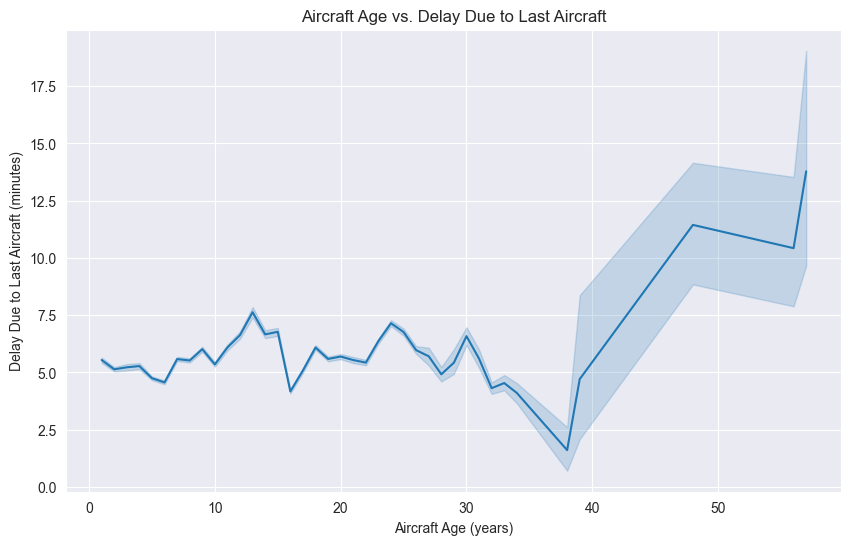

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Aicraft_age", y="Delay_LastAircraft", data=flights_df)
plt.title("Aircraft Age vs. Delay Due to Last Aircraft")
plt.xlabel("Aircraft Age (years)")
plt.ylabel("Delay Due to Last Aircraft (minutes)")
plt.show()

## What's the percentage of delays for each manufacturer

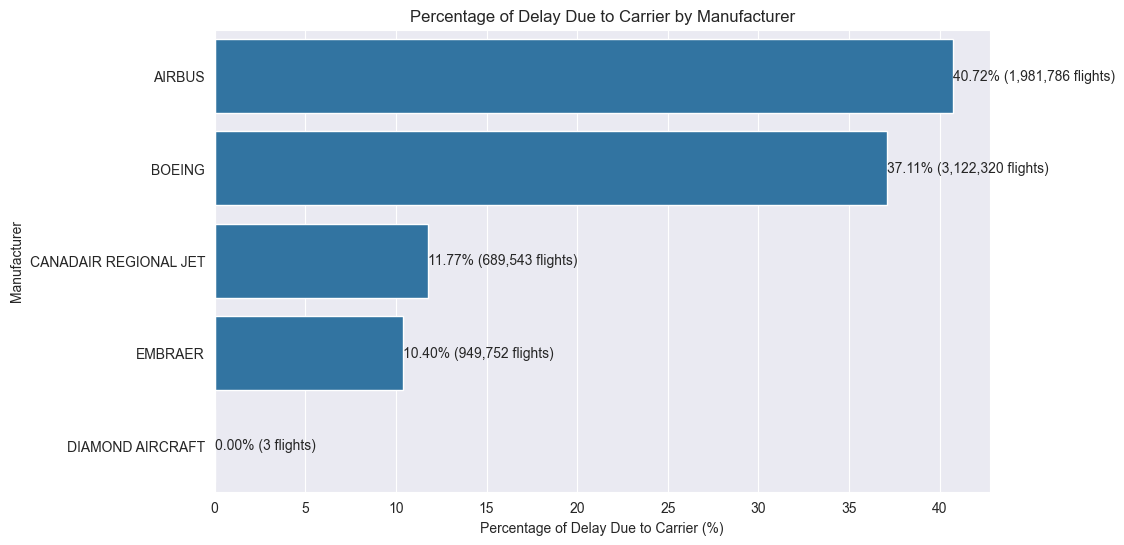

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming flights_df is already defined and contains the necessary data
# Calculate delay percentages by manufacturer
delay_percentage = (
    flights_df.groupby("Manufacturer")["Delay_Carrier"].sum()
    / flights_df["Delay_Carrier"].sum()
    * 100
)
delay_percentage.sort_values(ascending=False, inplace=True)

# Calculate the number of flights by manufacturer
flights_count = flights_df.groupby("Manufacturer").size()

#plotting 

plt.figure(figsize=(10, 6))
sns.barplot(
    y=delay_percentage.index,
    x=delay_percentage.values,
    order=delay_percentage.index
)

# Adding title
plt.title("Percentage of Delay Due to Carrier by Manufacturer")

# Adding labels
plt.xlabel("Percentage of Delay Due to Carrier (%)")
plt.ylabel("Manufacturer")


# Adding text annotations for each bar
for index, value in enumerate(delay_percentage.values):
    manufacturer = delay_percentage.index[index]
    flights = flights_count[manufacturer]
    plt.text(value, index, f"{value:.2f}% ({flights:,} flights)", ha="left", va="center")

plt.show()





 # 3. Multivariate Analysis

 ## Total Flight Delays by Delay Type
 This bar plot shows the total count of delays for each delay type. It helps understand which types of delays are most common across all flights.

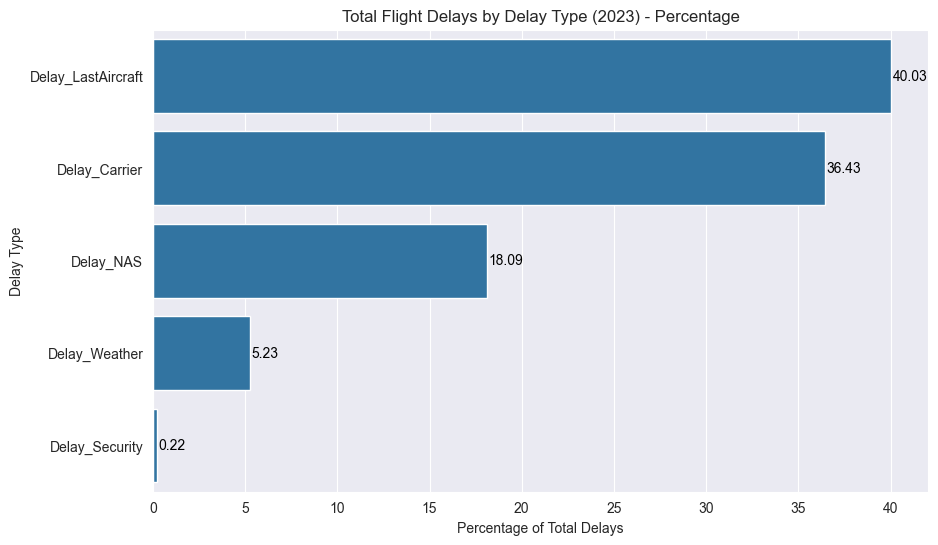

In [30]:
total_delay_sum = (
    flights_df[
        [
            "Delay_Carrier",
            "Delay_Weather",
            "Delay_NAS",
            "Delay_Security",
            "Delay_LastAircraft",
        ]
    ].sum().sum()
)
# Summing twice to get the total sum across all categories
delay_percentage = (
    flights_df[
        [
            "Delay_Carrier",
            "Delay_Weather",
            "Delay_NAS",
            "Delay_Security",
            "Delay_LastAircraft",
        ]
    ]
    .sum().div(total_delay_sum, level=0) # Divide each category sum by the total sum to get percentages
    .mul(100) # Multiply by 100 to convert to percentage
    .sort_values(ascending=False)    
)

plt.figure(figsize=(10, 6))
sns.barplot(
    y=delay_percentage.index,
    x=delay_percentage.values,
    order=delay_percentage.index
)
ax = plt.gca()
for index, value in enumerate(delay_percentage.values):
    ax.text(
        value + .1,  # Adjust the x position slightly to the right of the bar
        index,  # Use the index directly as the y position
        f"{value:.2f}",  # Display the value with two decimal places
        color="black",
        ha="left",  # Horizontal alignment
        va="center",  # Vertical alignment
    )

plt.title("Total Flight Delays by Delay Type (2023) - Percentage")
plt.xlabel("Percentage of Total Delays")
plt.ylabel("Delay Type")
plt.show()



 ## Correlation Analysis between Departure and Arrival Delays
 This scatter plot shows the relationship between departure delays and arrival delays. The trend line and correlation coefficient help quantify the strength of this relationship.

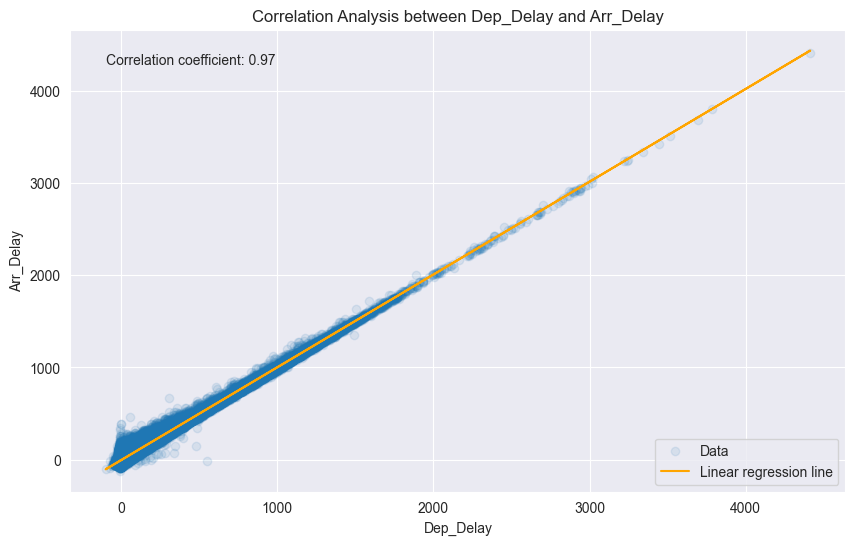

In [31]:
x = flights_df["Dep_Delay"]
y = flights_df["Arr_Delay"]

slope, intercept = np.polyfit(x, y, 1)
correlation = np.corrcoef(x, y)[0, 1]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Data", alpha=0.1)
plt.plot(x, slope * x + intercept, color="orange",label="Linear regression line")

plt.text(
    x.min(),
    y.max(),
    f"Correlation coefficient: {correlation:.2f}",
    verticalalignment= "top",
)

plt.xlabel("Dep_Delay")
plt.ylabel("Arr_Delay")
plt.title("Correlation Analysis between Dep_Delay and Arr_Delay")
plt.legend(loc = "lower right")
plt.grid(True)
plt.show()


 ## Cumulative Delays by Airline and Delay Type
 This stacked bar chart shows the breakdown of different types of delays for each airline. It helps compare not only the total delays but also the composition of delay types across airlines.

In [32]:
import plotly.express as px 

Delay_view = only_late_flights.loc[
    :,
    (
        "FlightDate",
        "Airline",
        "Delay_Carrier",
        "Delay_Weather",
        "Delay_NAS",
        "Delay_Security",
        "Delay_LastAircraft",
        "Dep_Delay",
        "Arr_Delay",
    ),
]
Delay_view["Sum_Delay"] =(
    Delay_view["Delay_Carrier"]
    +Delay_view["Delay_LastAircraft"]
    +Delay_view["Delay_Weather"]
    +Delay_view["Delay_NAS"]
    +Delay_view["Delay_Security"]
)

Airline_delay = Delay_view.groupby("Airline").agg(
    {
        "Dep_Delay": "mean",
        "Arr_Delay": "mean",
        "Sum_Delay": "mean",
        "Delay_Carrier": "mean",
        "Delay_LastAircraft": "mean",
        "Delay_Weather": "mean",
        "Delay_NAS": "mean",
        "Delay_Security": "mean",
    }
)

Airline_delay = Airline_delay.sort_values(by="Sum_Delay", ascending=False).reset_index()

fig = px.bar(
    Airline_delay,
    y="Airline",
    x=[
        "Delay_Carrier",
        "Delay_LastAircraft",
        "Delay_Weather",
        "Delay_NAS",
        "Delay_Security",
    ],
    title="Cumulative Delays (raw) by Airline (2023)",
    labels={"value": "Cumulative Delay (minutes)", "variable": "Delay Type"},
    color_discrete_sequence=px.colors.qualitative.Vivid,
    orientation="h",  # This line makes the bar chart horizontal
)

fig.add_shape(
    type="line",
    y0=1,
    y1=15,
    x1=Airline_delay["Sum_Delay"].mean(),
    x0=Airline_delay["Sum_Delay"].mean(),
    line=dict(color="red", width=2, dash="dash"),
)

fig.add_annotation(
    y=13,
    x=(Airline_delay["Sum_Delay"].mean() + 5),
    text="Global Average",
    showarrow=False,
    font=dict(color="red",size=12)
)

fig.update_layout(
    width=1500, # Set the width of the figure
    height=600, # Set the height of the figure
)


fig.show()




## Average departure delay by airport

**Let's observe the concentration of average departure delays with a ranking by airport (top 20).**
The Orlando airport in Florida stands out due to a high average departure delay of nearly 20 minutes compared to a national average of 12.7 minutes.


In [33]:
# Calculation + ranking (20) of average departure delays per airport
Airports_delay = (
    flights_df.groupby(["Dep_Airport", "Dep_CityName"])
    .agg({"Dep_Delay":"mean", "index": "count"})
    .reset_index()
)
Airports_delay = Airports_delay.sort_values(by="index", ascending=False).head(20)
Airports_delay["Dep_Delay"] = round(Airports_delay["Dep_Delay"], ndigits=2)
Airports_delay_rank = Airports_delay.sort_values(by="Dep_Delay", ascending=False) 
Airports_delay_rank










,Dep_Airport,Dep_CityName,Dep_Delay,index
70412,MCO,"Orlando, FL",19.55,161846
31388,DEN,"Denver, CO",15.80,284200
59735,JFK,"New York, NY",15.74,129620
31726,DFW,"Dallas/Fort Worth, TX",15.56,280021
55184,IAH,"Houston, TX",15.26,110392
38752,EWR,"Newark, NJ",15.24,134398
62787,LAS,"Las Vegas, NV",15.19,188206
15176,BOS,"Boston, MA",14.59,137555
24137,CLT,"Charlotte, NC",13.96,192870
81933,ORD,"Chicago, IL",12.40,255071


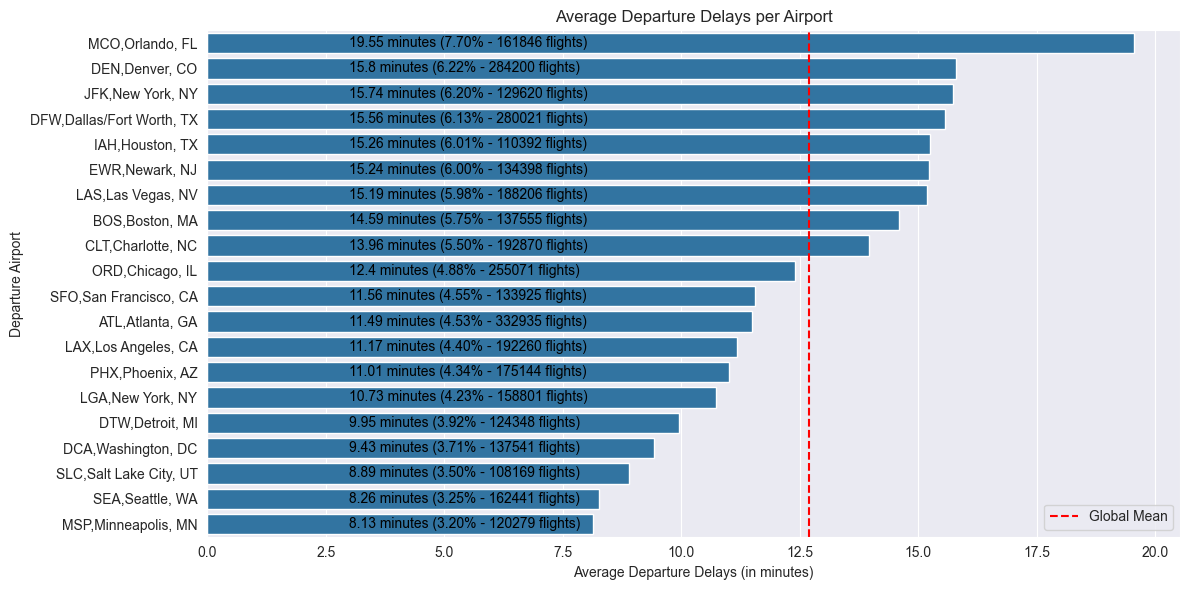

Global average delay: 12.7 minutes


In [34]:
# Calculation + ranking (20) of average departure delays per airport
rports_delays = (
        flights_df.groupby(["Dep_Airport", "Dep_CityName"])
    .agg({"Dep_Delay":"mean", "index": "count"})
    .reset_index()
)
Airports_delay = Airports_delay.sort_values(by="index", ascending=False).head(20)
Airports_delay["Dep_Delay"] = round(Airports_delay["Dep_Delay"], 2)

# Average departure delays per airport in minutes
Dep_delay_mean = Airports_delay["Dep_Delay"].mean()

# Ranking airports in descending order by average departure delays
Airports_delay_rank = (
    Airports_delay.sort_values(by="Dep_Delay", ascending=False)
)

# Total sum of average delays per airport to calculate percentages
total_delay_mean = Airports_delay["Dep_Delay"].sum()

# Calculation of percentage for each average delay compared to the total average delay

Airports_delay_rank["Percentage"] = (
    Airports_delay_rank["Dep_Delay"] / total_delay_mean * 100
)

# Concatenation of columns 'Dep_Airport' and 'Dep_CityName' to avoid duplicates like 'New York'
Airports_delay_rank["Dep_Airport_City"] = Airports_delay_rank["Dep_Airport"].astype(str) + "," + Airports_delay_rank["Dep_CityName"].astype(str)

# Horizontal bar plot with average departure delays per airport
plt.figure(figsize=(12, 6))
bars = sns.barplot(
    x=Airports_delay_rank["Dep_Delay"],
    y=Airports_delay_rank["Dep_Airport_City"],
)

plt.title("Average Departure Delays per Airport")
plt.xlabel("Average Departure Delays (in minutes)")
plt.ylabel("Departure Airport")

# Displaying the global average line
plt.axvline(x=Dep_delay_mean, color = "r", linestyle= "--", label="Global Mean")


# Displaying values per airport
for i ,(value, percent, count) in enumerate(
    zip(Airports_delay_rank["Dep_Delay"],
        Airports_delay_rank["Percentage"],
        Airports_delay_rank["index"])
    
):
    plt.text(
        3,
        i,
        f"{value} minutes ({percent:0.2f}% - {count} flights)",
        ha="left",
        va= "center",
        color="black",
    )

plt.legend()  # Adding legend for the global mean line
plt.tight_layout()
plt.show()

print(f"Global average delay: {round(Dep_delay_mean,2)} minutes")



**Let's use a map to visualize these average delays by airport:**
The 20 airports with the highest departure delays are spread across the entire US territory.

A higher concentration can be observed on the northeast coast around New York.

In [35]:
Airports_delay.sample(5)

,Dep_Airport,Dep_CityName,Dep_Delay,index
63486,LAX,"Los Angeles, CA",11.17,192260
15176,BOS,"Boston, MA",14.59,137555
30603,DCA,"Washington, DC",9.43,137541
59735,JFK,"New York, NY",15.74,129620
7242,ATL,"Atlanta, GA",11.49,332935


In [36]:
airports_df.sample(5)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
145,GST,Gustavus Airport,Gustavus,AK,USA,58.42438,-135.70738
267,PIH,Pocatello Regional Airport,Pocatello,ID,USA,42.91131,-112.59586
69,CLD,McClellan-Palomar Airport,San Diego,CA,USA,33.12723,-117.27873
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
277,PSP,Palm Springs International Airport,Palm Springs,CA,USA,33.82922,-116.50625


In [47]:
Airports_delay = pd.merge(
    Airports_delay,
    airports_df[["IATA_CODE", "LATITUDE","LONGITUDE"]],
    left_on="Dep_Airport",
    right_on= "IATA_CODE",
    how="left"
)
#Create a map centered on the United States 
m = folium.Map(location=[37, -95], zoom_start=5, width= "80%", height = "80%")

# Add a title to the map
title_html = '<h3 align="left" style="font-size:20px"><b>RANK 20 - Airports with the most departure delays</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

# Add a marker for each airport with a circle size proportional to the departure delay
for index, row in Airports_delay.iterrows():
    radius = row["Dep_Delay"] * 10000 # Multiply by a value to adjust circle size
    folium.Circle(
        location=[row["LATITUDE"], row["LONGITUDE"]],  # Airport location
        radius=radius,  # Circle size
        color="red",  # Circle color
        fill=True,  # Fill the circle
        fill_color="red",  # Fill color
        fill_opacity=0.3,  # Increased transparency
        popup=f"{row['Dep_Delay']} - {row['Dep_CityName']}\nDelay: {row['Dep_Delay']} minutes",
    ).add_to(m)

# Display the map
m



MergeError: Passing 'suffixes' which cause duplicate columns {'LATITUDE_x', 'LONGITUDE_x', 'IATA_CODE_x'} is not allowed.